One way to test for a warming climate is to measure the number of days above and below average over a time period. If temperature were not increasing, a reasonable conclusion is that the number of days above and below average would be roughly equal over long enough time periods. By contrast, a warming climate would see more days above average than below. We can calculate this by checking each day against a 30 year rolling average for that particular day in year and measuring the deviation from this number.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
whitestown = pd.read_csv('C:\csv\whitestownweather.csv')

cols = ['DATE', 'TMAX', 'TMIN']

whitestown = whitestown[cols]
whitestown['DATE'] = pd.to_datetime(whitestown['DATE'])
whitestown['YEAR'] = whitestown['DATE'].dt.year
whitestown['DOY'] = whitestown['DATE'].dt.dayofyear # day of year
whitestown.head()

,DATE,TMAX,TMIN,YEAR,DOY
0,1901-01-01,20.0,-4.0,1901,1
1,1901-01-02,21.0,-12.0,1901,2
2,1901-01-03,28.0,-6.0,1901,3
3,1901-01-04,40.0,3.0,1901,4
4,1901-01-05,35.0,18.0,1901,5


Let's start with 1969. We will slice this data out but still use the original dateframe to calculate with (because we need 1938-1968).

In [29]:
whitestown_slice = whitestown[whitestown['YEAR'] > 1990]
whitestown_slice.head()

,DATE,TMAX,TMIN,YEAR,DOY
32837,1991-01-01,34.0,14.0,1991,1
32838,1991-01-02,34.0,19.0,1991,2
32839,1991-01-03,28.0,16.0,1991,3
32840,1991-01-04,29.0,9.0,1991,4
32841,1991-01-05,34.0,23.0,1991,5


In [30]:
anom_list = []

for index, row in whitestown_slice.iterrows():
    start = row[3] - 30
    data_slice = whitestown[whitestown['DOY'] == row[4]]
    data_slice = data_slice[data_slice['YEAR'] > start]
    data_slice = data_slice[data_slice['YEAR'] < row[3]]
    
    average = data_slice['TMAX'].mean()
    anomaly = row[1] - average
    
    anom_list.append(anomaly)
    
whitestown_slice['ANOMALY'] = anom_list

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
whitestown_pos = whitestown_slice[whitestown_slice['ANOMALY'] > 0]
whitestown_neg = whitestown_slice[whitestown_slice['ANOMALY'] < 0]

In [32]:
whitestown_pos.shape[0]

5249

In [33]:
whitestown_neg.shape[0]

4947

So 5249 days were above average and 4947 were below average from 1991-2018. To test the significance of this result we can use a chi-square test.

In [34]:
from scipy.stats import chisquare

expected = [5098, 5098]
observed = [5249, 4947]

chisquare(observed, expected)

Power_divergenceResult(statistic=8.945076500588467, pvalue=0.0027821844271509574)

The pvalue indicates only a .27% chance that these values occurred randomly, so some forcing factor is likely. This does not necessarily mean that the warming is uniform though. One thing we can do is check the average temperature anomaly for the period for each individual day, and average each day of year's values together to get an average temperature anomaly for each day of the year.

In [35]:
cols = ['DOY', 'ANOMALY']
anomaly_df = whitestown_slice[cols]

In [36]:
anom = anomaly_df.groupby(['DOY']).mean()

In [37]:
xticks = np.arange(0,366,29)

month = ['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

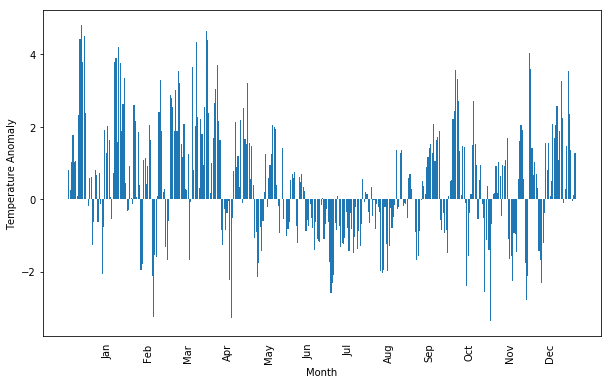

In [38]:
x = np.arange(1,367,1)
y = anom['ANOMALY']

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x,y)
plt.xlabel('Month')
plt.ylabel("Temperature Anomaly")
plt.tick_params(bottom=False)
ax.set_xticklabels(month, rotation='vertical')
ax.set_xticks(xticks)

Interestingly, it seems that that on average summer days have trended cooler than average and winter days trended much warmer in Whitestown, IN. It would be problematic to extend this result to the entire U.S., though. More data points would be needed to reach a conclusion.

This analysis can also be done to examine minimum temperatures. This is done below.

In [39]:
anom_list = []

for index, row in whitestown_slice.iterrows():
    start = row[3] - 30
    data_slice = whitestown[whitestown['DOY'] == row[4]]
    data_slice = data_slice[data_slice['YEAR'] > start]
    data_slice = data_slice[data_slice['YEAR'] < row[3]]
    
    average = data_slice['TMIN'].mean()
    anomaly = row[2] - average
    
    anom_list.append(anomaly)
    
whitestown_slice['ANOMALY'] = anom_list

whitestown_pos = whitestown_slice[whitestown_slice['ANOMALY'] > 0]
whitestown_neg = whitestown_slice[whitestown_slice['ANOMALY'] < 0]

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
whitestown_pos.shape[0]

5768

In [41]:
whitestown_neg.shape[0]

4426

It looks like 5768 days had minimum temperatures above average, while only 4426 were below average. Like before, we can perform a chisquare test to check the probability that this result could occur by chance in a non-warming environment.

In [42]:
expected = [5097, 5097]
observed = [5768, 4426]

chisquare(observed, expected)

Power_divergenceResult(statistic=176.66902099274083, pvalue=2.5866936928885684e-40)

This pvalue is many orders of magnitude smaller than the previously calculated value, suggesting a much, much stronger conclusion that these values would not occur by chance.

In [43]:
anomaly_df = whitestown_slice[cols]
anom = anomaly_df.groupby(['DOY']).mean()

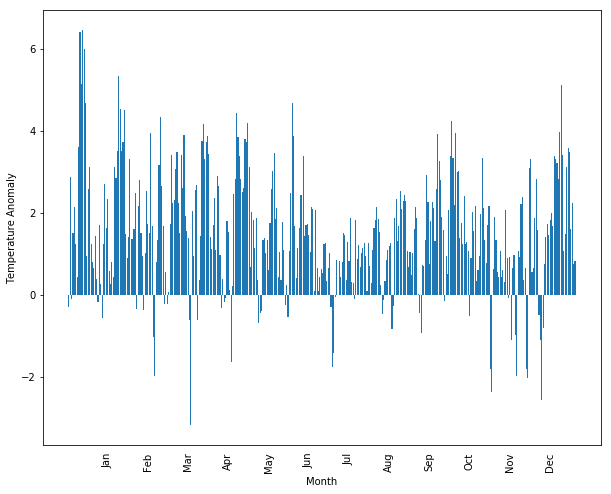

In [44]:
y = anom['ANOMALY']

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x,y)
plt.xlabel('Month')
plt.ylabel('Temperature Anomaly')
plt.tick_params(bottom=False)
ax.set_xticklabels(month, rotation='vertical')
ax.set_xticks(xticks)
plt.show()

Daily minimum temperatures are clearly warming more uniformly than daily maximum temperatures. It is also clear that the average temperature anomaly is larger for minimum temperature than maximum.